# Bike Rental Project 

#### The objective of this Case is to Predication of bike rental count on daily based on the environmental and seasonal settings.

### Import libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data = pd.read_csv("day.csv")

In [3]:
Data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Exploratory Data Analysis

In [4]:
Data.shape

(731, 16)

In [5]:
Data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
Data.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [7]:
Data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Removed instant it just represent index 
#### Removed dteday date parameter mostly use for time series model 
#### Removed casual and registered because we have total count as CNT

In [8]:
Data = Data.drop(Data.columns[[0, 1, 13, 14]], axis = "columns")
print(Data.shape)

(731, 12)


#### Defining Numeric and Categorical Varibales

In [9]:
numeric_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
categorical_var = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

### Missing Value Analysis

In [10]:
Data.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

### Outlier Analysis

temp


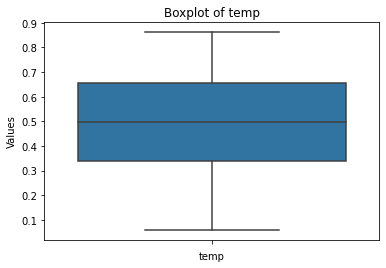

atemp


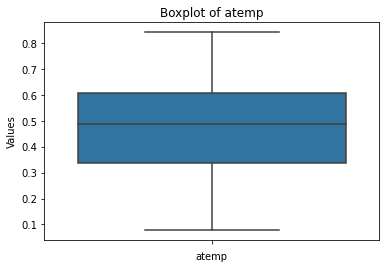

hum


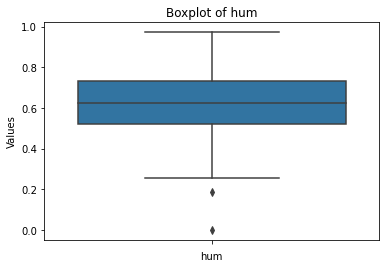

windspeed


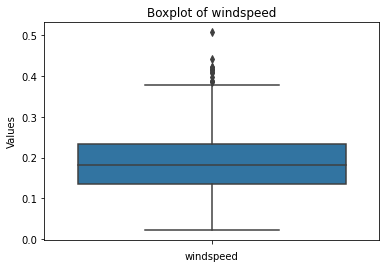

cnt


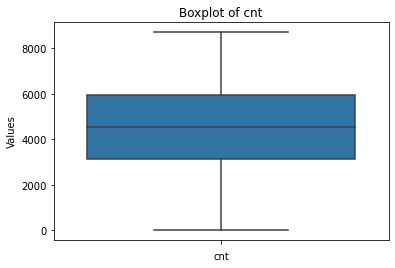

In [11]:
for i in numeric_var:
 print(i)
 sns.boxplot(y = Data[i])
 plt.xlabel(i)
 plt.ylabel("Values")
 plt.title("Boxplot of " + i)
 plt.show()

### Humidity and Weendspeed have some outliers 

#### Calculate inner fence, outer fence and IQR

In [12]:
# Identify outliers
#calculate Inner Fence, Outer Fence, and IQR
for i in numeric_var:
 print(i)
 q75, q25 = np.percentile(Data.loc[:,i], [75, 25])
 iqr = q75 - q25
 Innerfence = q25 - (iqr*1.5)
 Upperfence = q75 + (iqr*1.5)
 print("Innerfence= "+str(Innerfence))
 print("Upperfence= "+str(Upperfence))
 print("IQR ="+str(iqr))

# replace outliers with NA
 Data.loc[Data[i]<Innerfence, i] = np.nan
 Data.loc[Data[i]>Upperfence, i] = np.nan

temp
Innerfence= -0.14041600000000015
Upperfence= 1.1329160000000003
IQR =0.3183330000000001
atemp
Innerfence= -0.06829675000000018
Upperfence= 1.0147412500000002
IQR =0.2707595000000001
hum
Innerfence= 0.20468725
Upperfence= 1.0455212500000002
IQR =0.21020850000000002
windspeed
Innerfence= -0.012446750000000034
Upperfence= 0.38061125
IQR =0.0982645
cnt
Innerfence= -1054.0
Upperfence= 10162.0
IQR =2804.0


In [13]:
Data.isnull().sum()

season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
cnt            0
dtype: int64

In [14]:
Data['hum'] = Data['hum'].fillna(Data['hum'].median())
Data['windspeed'] = Data['windspeed'].fillna(Data['windspeed'].median())

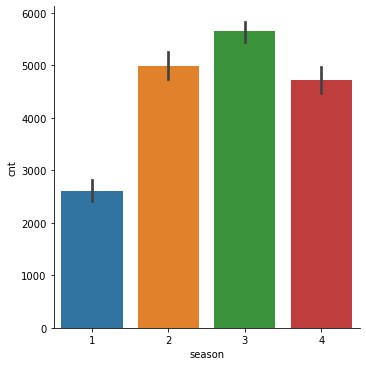

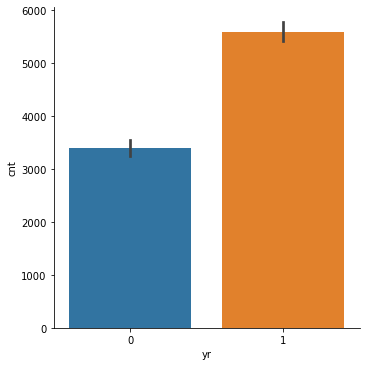

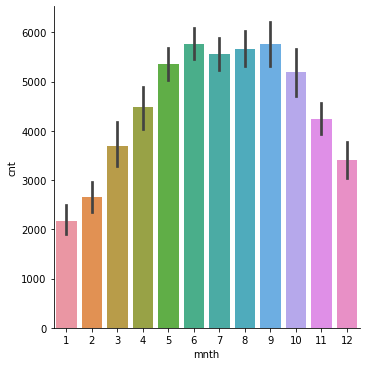

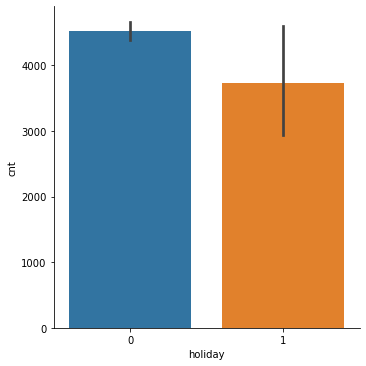

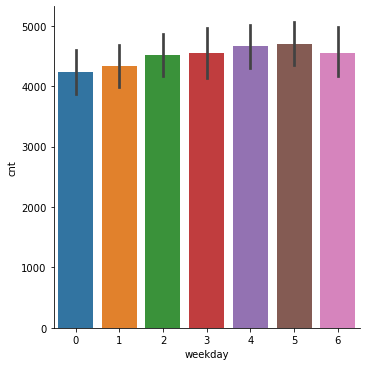

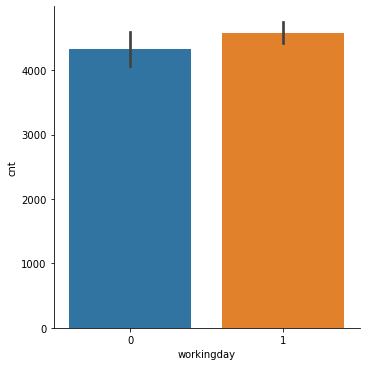

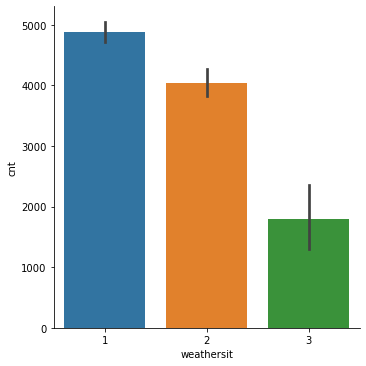

In [15]:
for i in categorical_var:
 sns.catplot(x = i, y = "cnt", data=Data, kind = "bar")

#### In Season 2, 3 and 4 has the highest count
#### In Year 1 has high count than 0
#### In Months 3 to 10 has got pretty good count
#### On holidays the count is higher compared non-holidays
#### In weekdays, 0 and 6 has the highest count
#### In weather, 1 has the highest count

Text(0.5, 0, 'Windspeed')

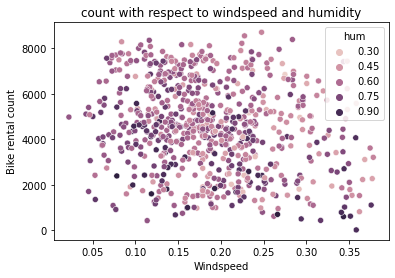

In [16]:
scatter_plot1 = sns.scatterplot(x="windspeed", y="cnt", hue="hum", data= Data)
plt.title("count with respect to windspeed and humidity")
plt.ylabel("Bike rental count")
plt.xlabel("Windspeed")

#### count vs windspeed and humidity, Count is High in ranges, windspeed 0.10 to 0.25 and humidity 0.5 to 0.75

Text(0.5, 0, 'Weekdays')

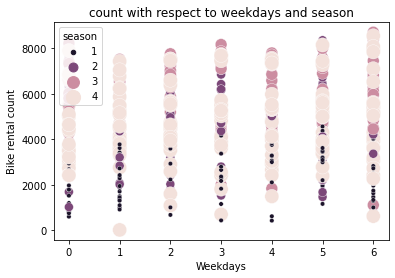

In [17]:
cmap = sns.cubehelix_palette(dark=.9, light=.1, as_cmap=True)

scatter_plot2 = sns.scatterplot(x="weekday", y="cnt", hue="season", size="season", sizes = (20, 200), palette=cmap, data= Data)

plt.title("count with respect to weekdays and season")
plt.ylabel("Bike rental count")
plt.xlabel("Weekdays")

#### count vs weekdays and season, Count is high in 1st season and 4th and 6th weekdays


Text(0.5, 0, 'Temperature')

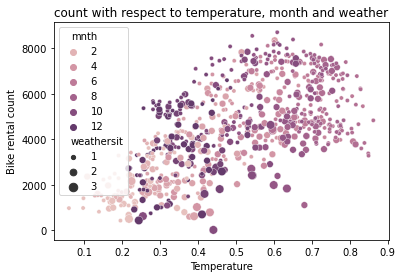

In [18]:
cmap2 = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
scatter_plot3 = sns.scatterplot(x="temp", y="cnt", hue="mnth", size="weathersit", palette=cmap2, data= Data)
plt.title("count with respect to temperature, month and weather")
plt.ylabel("Bike rental count")
plt.xlabel("Temperature")

#### count vs temperature, month and weather, Count is high in range temperature 0.5 to 0.8, in 8th month and weather is 0.

Text(0.5, 0, 'Month')

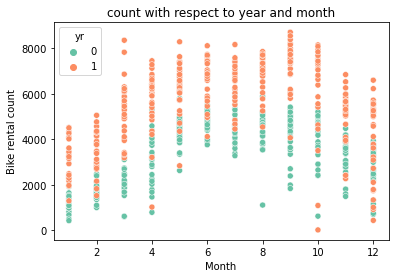

In [19]:
cmap3 = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
scatter_plot4 = sns.scatterplot(x="mnth", y="cnt", hue="yr", palette="Set2", data= Data)
plt.title("count with respect to year and month")
plt.ylabel("Bike rental count")
plt.xlabel("Month")

#### count vs respect to year and month, count is high in year 1, particularly from season 3 to 12 excluding 9

## Correlation Analysis 

In [20]:
Data_cor = Data.loc[:, numeric_var]
correlation_result = Data_cor.corr()
print(correlation_result)

               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991702  0.123723  -0.138937  0.627494
atemp      0.991702  1.000000  0.137312  -0.164157  0.631066
hum        0.123723  0.137312  1.000000  -0.200237 -0.121454
windspeed -0.138937 -0.164157 -0.200237   1.000000 -0.215203
cnt        0.627494  0.631066 -0.121454  -0.215203  1.000000


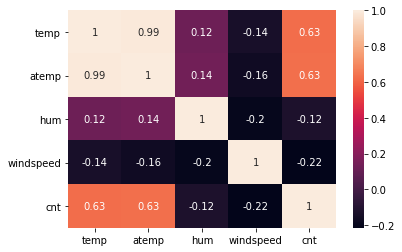

In [21]:
heatmap = sns.heatmap(correlation_result, annot=True)

#### temp and atemp highly correlated with each other

### ANOVA Test

In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
for i in categorical_var:
 mod = ols('cnt' + '~' + i, data = Data).fit()
 anova_table = sm.stats.anova_lm(mod, typ = 2)
 print(anova_table)

                sum_sq     df           F        PR(>F)
season    4.517974e+08    1.0  143.967653  2.133997e-30
Residual  2.287738e+09  729.0         NaN           NaN
                sum_sq     df           F        PR(>F)
yr        8.798289e+08    1.0  344.890586  2.483540e-63
Residual  1.859706e+09  729.0         NaN           NaN
                sum_sq     df          F        PR(>F)
mnth      2.147445e+08    1.0  62.004625  1.243112e-14
Residual  2.524791e+09  729.0        NaN           NaN
                sum_sq     df         F    PR(>F)
holiday   1.279749e+07    1.0  3.421441  0.064759
Residual  2.726738e+09  729.0       NaN       NaN
                sum_sq     df         F    PR(>F)
weekday   1.246109e+07    1.0  3.331091  0.068391
Residual  2.727074e+09  729.0       NaN       NaN
                  sum_sq     df         F    PR(>F)
workingday  1.024604e+07    1.0  2.736742  0.098495
Residual    2.729289e+09  729.0       NaN       NaN
                  sum_sq     df          F 

#### holiday, weekday and workingday has p value > 0.05, by which, we accept null hypothesis.

In [23]:
Final_Data = Data.drop(['atemp', 'holiday', 'weekday', 'workingday'], axis = "columns")
print(Final_Data.shape)

(731, 8)


### Final variable

In [24]:
numeric_var = ["temp","hum","windspeed","cnt"] # numeric variables
categorical_var = ["season", "yr", "mnth", "weathersit"] # categorical variables

### Feature Scaling

In [25]:
Final_Data.describe()

,season,yr,mnth,weathersit,temp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,1.395349,0.495385,0.629354,0.186257,4504.348837
std,1.110807,0.500342,3.451913,0.544894,0.183051,0.139566,0.071156,1937.211452
min,1.000000,0.000000,1.000000,1.000000,0.059130,0.254167,0.022392,22.000000
25%,2.000000,0.000000,4.000000,1.000000,0.337083,0.522291,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,1.000000,0.498333,0.627500,0.178802,4548.000000
75%,3.000000,1.000000,10.000000,2.000000,0.655417,0.730209,0.229785,5956.000000
max,4.000000,1.000000,12.000000,3.000000,0.861667,0.972500,0.378108,8714.000000


temp


E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


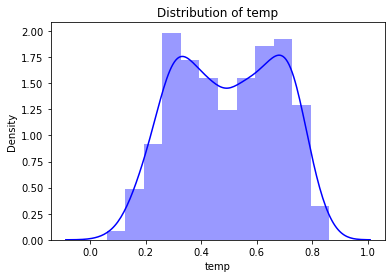

hum


E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


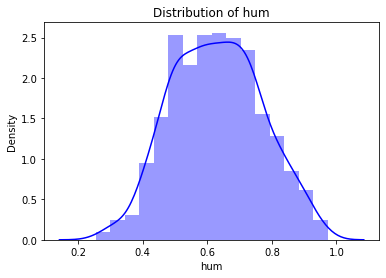

windspeed


E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


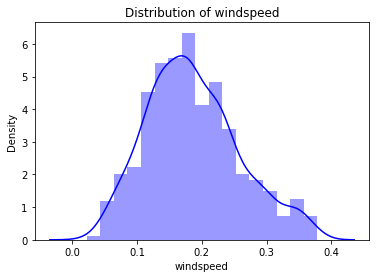

E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


cnt


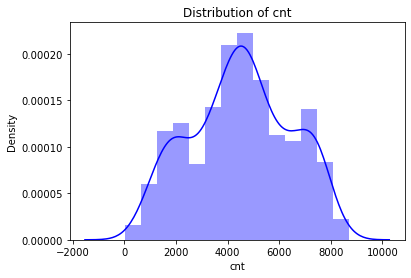

In [26]:
# Check normality
for i in numeric_var:
 print(i)
 sns.distplot(Final_Data[i], bins = 'auto', color = 'blue')
 plt.title("Distribution of "+i)
 plt.ylabel("Density")
 plt.show()

## Each variable is normalized 

### No need of feature scaling 

In [27]:
Data_Final = Final_Data

### Generating  Dummy Variables

In [28]:
Data_Final = pd.get_dummies(Data_Final, columns = categorical_var)
Data_Final.shape

(731, 25)

## Model Development

#### Error Metric

In [29]:
def MAPE(y_actual, y_predicted):
 MAPE = np.mean(np.abs(y_actual-y_predicted)/y_actual)*100
 return MAPE

In [30]:
def Rsquare(y_actual, y_predicted):
    mean_y_actual = np.mean(y_actual)
    numerator = 0
    denominator = 0
    for y_actual, y_predicted in zip(y_actual, y_predicted):
        numerator += (y_actual - y_predicted)**2
        denominator += (y_actual - mean_y_actual)**2
        ratio = numerator / denominator
 
    return 1 - ratio

In [31]:
X = Data_Final.drop(['cnt'], axis = "columns")
Y = Data_Final['cnt']

In [32]:
from sklearn.metrics import accuracy_score
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Decision Tree Model

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.20, random_state=0)

In [34]:
from sklearn.tree import DecisionTreeRegressor
Tree_Model = DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)

In [35]:
D_test = Tree_Model.predict(X_test)

Mape_tree = MAPE(y_test, D_test)

R2_tree = Rsquare(y_test, D_test)

Acc_tree = 100 - Mape_tree


In [36]:
print("MAPE:-"+str(Mape_tree))
print("ACCURACY:-"+str(100 - Mape_tree))
print("Rsquare:-"+str(R2_tree))

MAPE:-36.94809301452646
ACCURACY:-63.05190698547354
Rsquare:-0.6464697716428665


### Random Forest Model

In [37]:
from sklearn.ensemble import RandomForestRegressor
RFModel = RandomForestRegressor(n_estimators=100).fit(X_train,y_train)

In [38]:
RFTest = RFModel.predict(X_test)

In [39]:
Mape_rf = MAPE(y_test, RFTest)

R2_rf = Rsquare(y_test, RFTest)

Acc_rf = 100 - Mape_rf

In [40]:
print("MAPE:-"+str(Mape_rf))
print("ACCURACY:-"+str(100 - Mape_rf))
print("Rsquare:-"+str(R2_rf))

MAPE:-20.447167232476453
ACCURACY:-79.55283276752354
Rsquare:-0.8824755831274108


### Linear Regression Model

In [41]:
from sklearn.linear_model import LinearRegression
LRModel = LinearRegression().fit(X_train,y_train)

In [42]:
LRTest = LRModel.predict(X_test)

In [43]:
Mape_lr = MAPE(y_test, LRTest)

R2_lr = Rsquare(y_test, LRTest)

Acc_lr = 100 - Mape_lr

In [44]:
print("MAPE:-"+str(Mape_lr))
print("ACCURACY:-"+str(100 - Mape_lr))
print("Rsquare:-"+str(R2_lr))

MAPE:-18.782083030717057
ACCURACY:-81.21791696928294
Rsquare:-0.8410468277222658


###  Comparison of models' accuracy

In [45]:
models = ['DesicionTree','RandomForest',  'Liner Regression']
col = [Acc_tree, Acc_rf, Acc_lr]
data = {'Models':models,'Accuracy':col}
graph_df = pd.DataFrame(data)
graph_df

,Models,Accuracy
0,DesicionTree,63.051907
1,RandomForest,79.552833
2,Liner Regression,81.217917


In [46]:
graph_df = graph_df.sort_values(by=['Accuracy'], axis = 0, ascending=False)

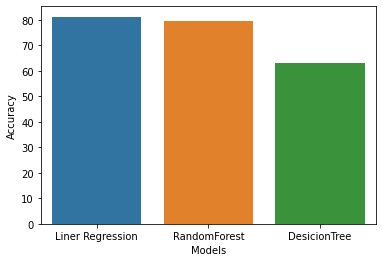

In [47]:
fig, ax = plt.subplots()
sns.barplot(x=graph_df['Models'], y=graph_df['Accuracy'], data=graph_df);

###  Comparison of models' MAPE

In [48]:
models = ['DesicionTree','RandomForest',  'Liner Regression']
col = [Mape_tree, Mape_rf, Mape_lr]
data = {'Models':models,'MAPE':col}
graph_df = pd.DataFrame(data)
graph_df

,Models,MAPE
0,DesicionTree,36.948093
1,RandomForest,20.447167
2,Liner Regression,18.782083


In [49]:
graph_df = graph_df.sort_values(by=['MAPE'], axis = 0, ascending=False)

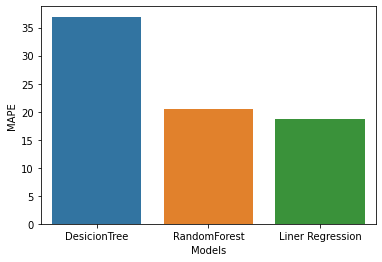

In [50]:
fig, ax = plt.subplots()
sns.barplot(x=graph_df['Models'], y=graph_df['MAPE'], data=graph_df);

### Comparison of models' Rsquare

In [51]:
models = ['DesicionTree','RandomForest',  'Liner Regression']
col = [R2_tree, R2_rf, R2_lr]
data = {'Models':models,'R2':col}
graph_df = pd.DataFrame(data)
graph_df

,Models,R2
0,DesicionTree,0.646470
1,RandomForest,0.882476
2,Liner Regression,0.841047


In [52]:
graph_df = graph_df.sort_values(by=['R2'], axis = 0, ascending=False)

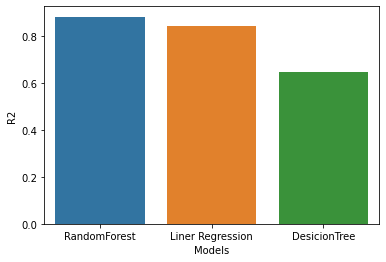

In [53]:
fig, ax = plt.subplots()
sns.barplot(x=graph_df['Models'], y=graph_df['R2'], data=graph_df);